In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from model import _build_model
from core import Graph

import sys 
from ruixuan.turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle
import math
from collections import deque
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from tabulate import tabulate
from utils import Gibbs_sampling, get_smoothness, get_distance_pt
from config import Config
from visualizer import plot_scene_on_grid
import itertools

In [ ]:
# new a graph  
env = Graph()
sample = env.sample
# act/plan the 10 steps

# add use the history info in target to sample

# visualize the sample

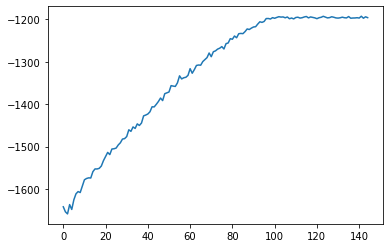

In [135]:
import matplotlib.pyplot as plt
import numpy as np
# reward_history = np.load('episode_history_collision_g2.npy', allow_pickle=True)
# reward_history = np.load('simple_model2_episode_history.npy', allow_pickle=True) 
reward_history = np.load('simple_model_episode_history_lowc.npy', allow_pickle=True)
# reward_history = np.load('rightturn_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through2_episode_history.npy', allow_pickle=True) 
x=[]
for i in range(0, len(reward_history), 1000):
    x.append(sum(reward_history[i:i+1000])/1000)
# print(x.shape)
plt.plot(range(len(x)), x)
plt.show()